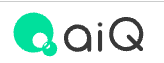

[disclaimer](./disclaimer.txt/)

# ALTERNATIVE DATA Evaluation Demo

## Evaluate aiQ POS ELEC Goods using aiQ Lab Alt Data Evaluation Tool

In [1]:
%load_ext autoreload
%autoreload 2

### Step1: Import Library

In [5]:
import sys
import numpy as np
import pandas as pd
import plotly.io
import plotly.express as px

for_html = False
if for_html == True:
    plotly.offline.init_notebook_mode()
else:
    plotly.io.renderers.default = 'iframe'

sys.path.append('../..')

from utils.shortcut import single_dataset as sc
from aiq_strategy_robot.data.data_accessor import DAL
from utils.shortcut.path import DEFAULT_DIR

In [6]:
from functools import partial

In [7]:
from aiq_strategy_robot.data.FINNHUB import (
    load_finnhub_equity_prices,
    load_finnhub_dividends,
    load_finnhub_stock_splits,
    load_finnhub_equity_data,
    load_finnhub_symbol_lookup
)

In [8]:
from itertools import product
from random import sample

In [9]:
sdh = DAL()

### Step2: Load Data
Retrieve each factor and register it to `handler`.
> In this sample, retrieval and registration operations are omitted.

In [10]:
sdh.extract.clear()

#  Load Alternative Data
data_id_alt = sc.register_elec_data(sdh, data_dir=DEFAULT_DIR)

#  Load Fundamental Data
data_id_funda = sc.register_fundamental_data(sdh)

### load stock price from finnhub.

In [11]:
target_stock_ticker = sdh.get_raw_data(data_id_alt).index.get_level_values('ticker').unique().to_list()

In [12]:
data_id_mkt = sc.load_finnhub_equity_data_fixed_ticker(sdh, data_dir=DEFAULT_DIR)

In [13]:
display(sdh.get_raw_data(data_id_alt).tail())
display(sdh.get_raw_data(data_id_funda).tail())
display(sdh.get_raw_data(data_id_mkt).tail())

variable            pos_sales     share  unit_price  unit_price_vs_ind
ticker  datetime                                                      
9928-JP 2022-11-05   0.003900  0.001311    0.130007           0.108800
        2023-10-26   0.003900  0.000422    0.130007           0.107093
        2023-12-22   0.016121  0.002433    0.537438           0.328411
        2024-01-31   0.016121  0.002665    0.537438           0.405101
        2024-02-12   0.016121  0.004272    0.537438           0.422939

sales
ticker  datetime           
9997-JP 2022-12-31  61675.0
        2023-03-31  51922.0
        2023-06-30  51842.0
        2023-09-30  44263.0
        2023-12-31  60173.0

close
ticker  datetime          
9928-JP 2024-06-11  1809.0
        2024-06-12  1818.0
        2024-06-13  1790.0
        2024-06-14  1854.0
        2024-06-17  1837.0

### Data density check.

In [14]:
variable = 'pos_sales'
lower_bound = 0.9
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-12-31')

In [15]:
dfcheck = sdh.get_raw_data(data_id_alt)[[variable]].unstack('ticker').droplevel(0, axis=1)
if start_date:
    dfcheck = dfcheck.loc[dfcheck.index > start_date]
if end_date:
    dfcheck = dfcheck.loc[dfcheck.index < end_date]
dfcheck.dropna(how='all', axis=1, inplace=True)
num_obs = len(dfcheck)
dfcount = dfcheck.count()
list_dense_tickers = dfcount.loc[dfcount / num_obs > lower_bound].index.tolist()

# showing the list of tickers that have more than `lower_bound`
print(f'Tickers with observations for more than {lower_bound *  100}% of datetime after {start_date}.')
print(f'number of dense tickers: {len(list_dense_tickers)}')
', '.join(list_dense_tickers)

Tickers with observations for more than 90.0% of datetime after 2020-01-01 00:00:00.
number of dense tickers: 70


'3086-JP, 3635-JP, 3663-JP, 3774-JP, 3861-JP, 3863-JP, 3864-JP, 4188-JP, 4344-JP, 4686-JP, 4704-JP, 4901-JP, 6448-JP, 6501-JP, 6502-JP, 6503-JP, 6516-JP, 6628-JP, 6632-JP, 6645-JP, 6670-JP, 6676-JP, 6701-JP, 6702-JP, 6703-JP, 6724-JP, 6727-JP, 6731-JP, 6737-JP, 6750-JP, 6752-JP, 6753-JP, 6758-JP, 6773-JP, 6803-JP, 6804-JP, 6816-JP, 6839-JP, 6897-JP, 6916-JP, 6930-JP, 6952-JP, 6971-JP, 7228-JP, 7297-JP, 7483-JP, 7731-JP, 7733-JP, 7751-JP, 7752-JP, 7944-JP, 7951-JP, 7952-JP, 7962-JP, 7974-JP, 7976-JP, 7984-JP, 7987-JP, 8001-JP, 8032-JP, 8051-JP, 8074-JP, 8130-JP, 8202-JP, 9433-JP, 9437-JP, 9503-JP, 9504-JP, 9684-JP, 9748-JP'

In [16]:
# Set Alias (Optional)
sdh.set_alias({
    data_id_alt: 'aiq_pos_elec_goods',
    data_id_funda: 'sales',
    data_id_mkt: 'market'
})

# Check if the data is registered OK.
sdh.extract_definition

,category,data_source,source,table,alias,tickers,index,start_datetime,end_datetime
data_id,,,,,,,,,
1,RawData,External,Unknown,Unknown,aiq_pos_elec_goods,"[1956-JP, 2180-JP, 2321-JP, 2323-JP, 2326-JP, ...","[ticker, datetime]",2009-01-01 00:00:00,2024-03-07 00:00:00
2,RawData,external,sample,Unknown,sales,"[1301-JP, 1332-JP, 1333-JP, 1379-JP, 1380-JP, ...","[ticker, datetime]",2008-03-31 00:00:00,2024-01-31 00:00:00
3,RawData,External,Unknown,Unknown,market,"[2180-JP, 2321-JP, 2323-JP, 2326-JP, 2354-JP, ...","[ticker, datetime]",2007-01-04 00:00:00,2024-06-17 00:00:00


### Step3: Correlation Analysis

#### Step 3.1: measuring usefulness against fundamentals

In [17]:
from aiq_strategy_robot.evaluator import AltDataEvaluator

# Initialize AltDataEvaluator
ade = AltDataEvaluator(sdh)

In [18]:
features = sdh.get_raw_data(data_id_alt).columns
features

Index(['pos_sales', 'share', 'unit_price', 'unit_price_vs_ind'], dtype='object', name='variable')

##### Visualisation of Alt Data and Fundamental data for any one ticker

In [19]:
sample_target = "3861-JP"

sdh.transform.clear()
funda_Q_ids = sdh.transform.resample(data_id=data_id_funda, rule='Q', func='last').variable_ids
alt_Q_ids = sdh.transform.resample(data_id=data_id_alt, rule='Q', func='mean').variable_ids

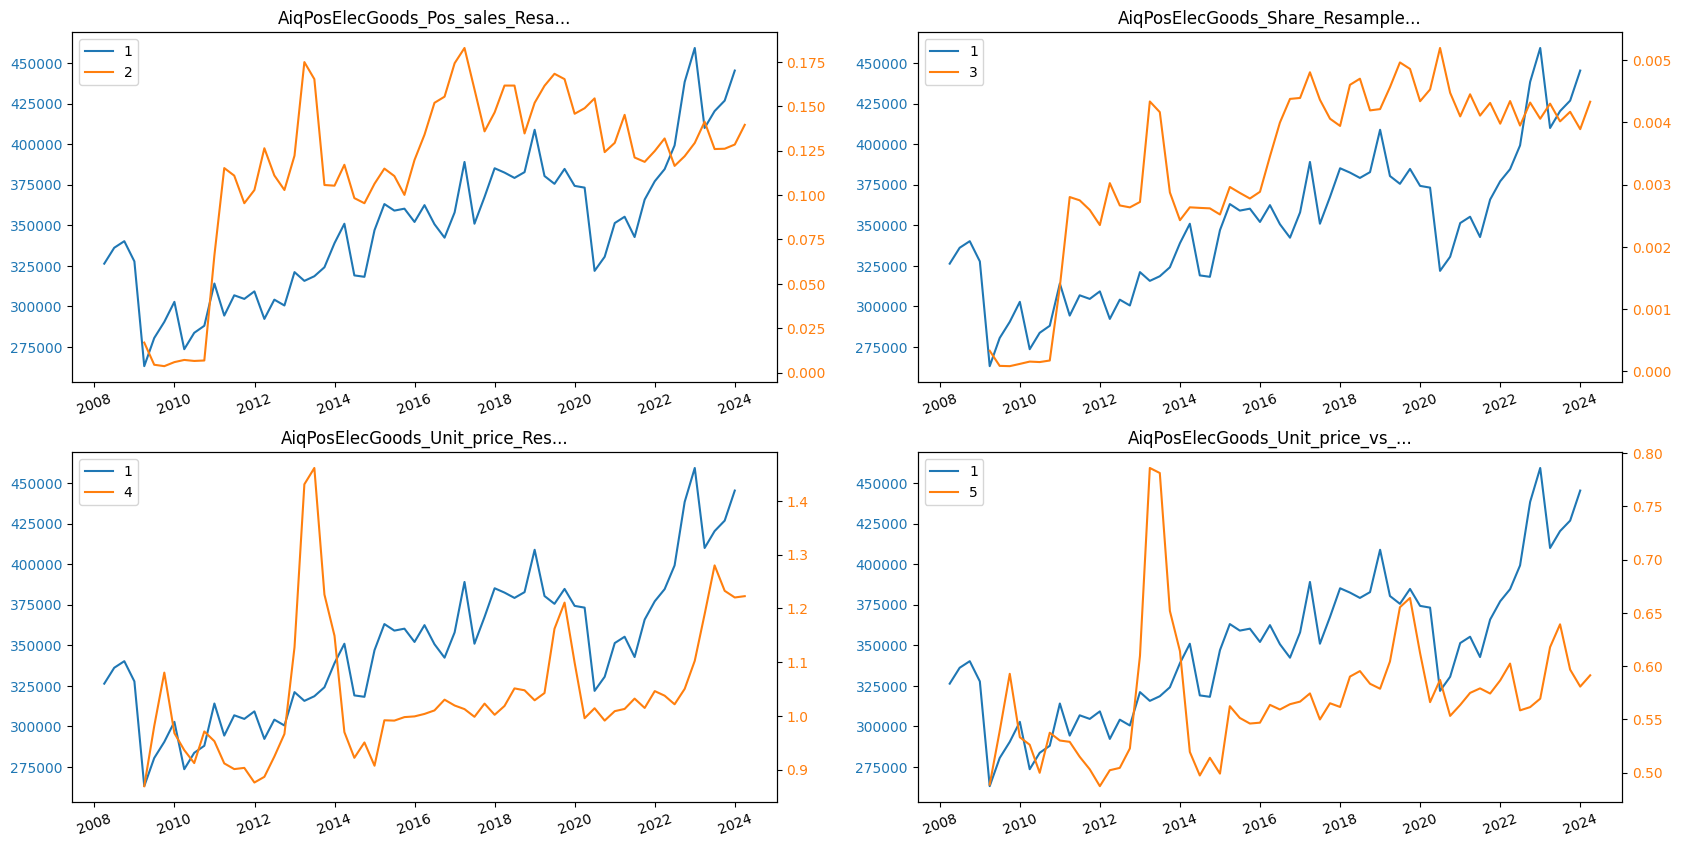

In [20]:
sdh.show_line_one_target(
    target=sample_target, #どの ticker のデータを描画するかを決めます
    y=funda_Q_ids[0], #y軸に表示するデータを variable_id で指定します
    X=alt_Q_ids, #x軸に表示するデータを variable_id の list で指定します（複数のグラフを一気に表示する時に list にします）
    col_num=2, #1行にいくつのグラフを表示するかを決めます
    vname_len_limit=30, #タイトルにXのvariable_id の変数名が表示されますが、表示を短くするために文字数を指定します
)

##### Visualisation of Alt data shifted in several patterns.

In [21]:
alt_Q_shift_1_ids = sdh.transform.shift(data_id=data_id_alt, periods=1).resample(rule='Q', func='mean').variable_ids
alt_Q_shift_2_ids = sdh.transform.shift(data_id=data_id_alt, periods=2).resample(rule='Q', func='mean').variable_ids
alt_Q_shift_3_ids = sdh.transform.shift(data_id=data_id_alt, periods=3).resample(rule='Q', func='mean').variable_ids
alt_Q_shift_4_ids = sdh.transform.shift(data_id=data_id_alt, periods=4).resample(rule='Q', func='mean').variable_ids

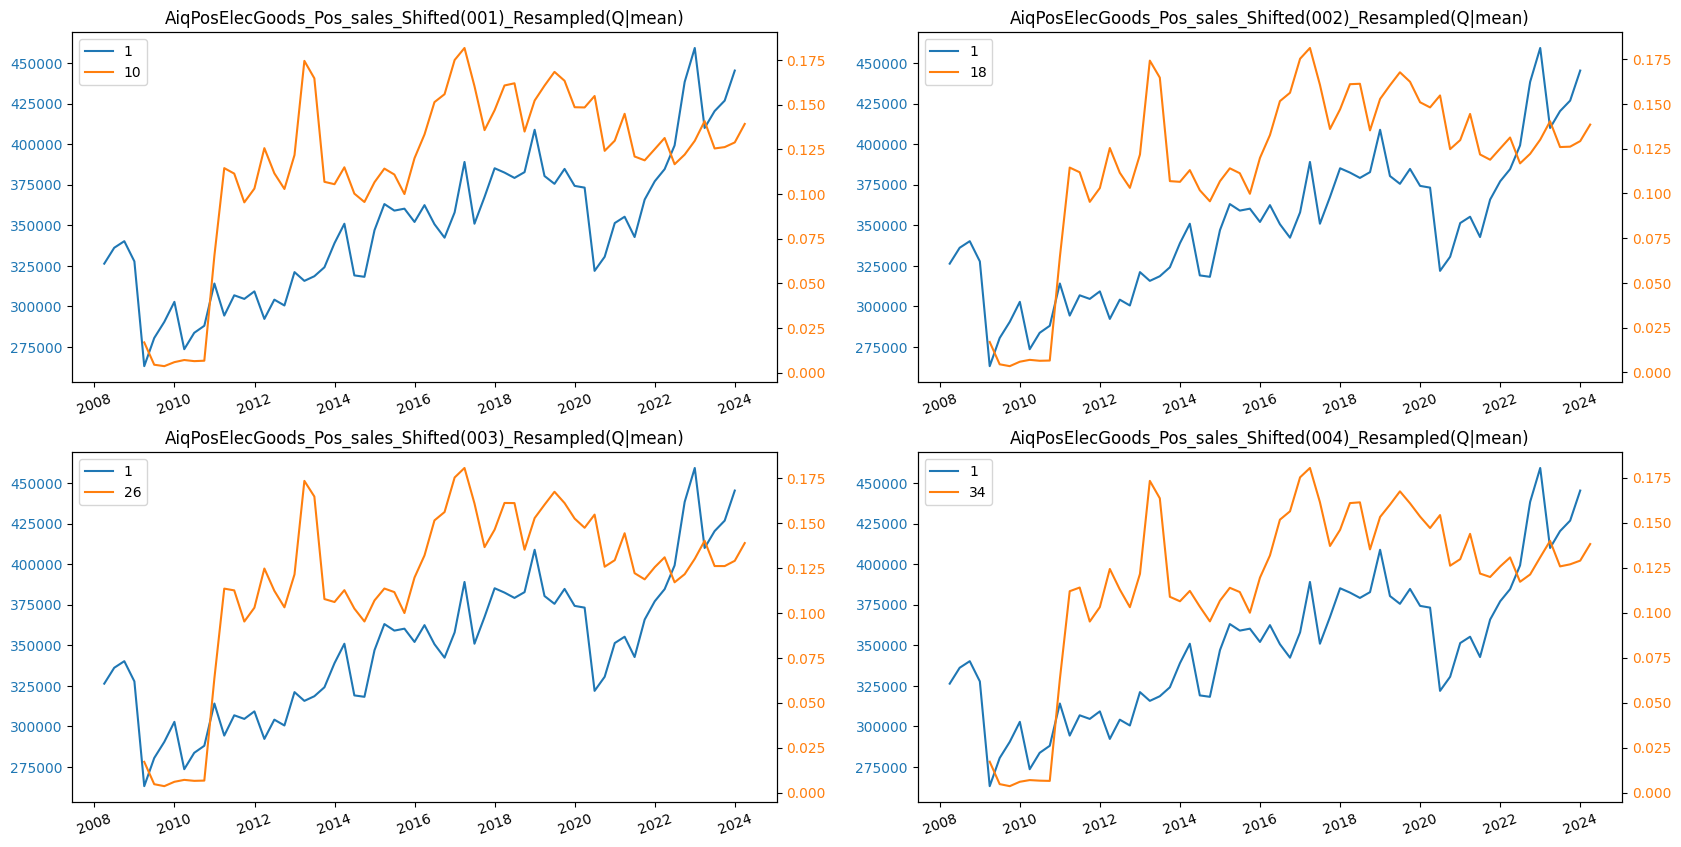

In [22]:
# View Sales vs Pos Sales
sdh.show_line_one_target(
    target=sample_target,
    y=funda_Q_ids[0],
    X=[alt_Q_shift_1_ids[0], alt_Q_shift_2_ids[0], 
       alt_Q_shift_3_ids[0], alt_Q_shift_4_ids[0]],
    col_num=2
)

##### Logarithmic transformation and correlation checks.

In [23]:
sales_id = sdh.transform.log_diff(fields=funda_Q_ids, periods=4).diff(periods=1).variable_ids[-1]
alt_Q_shift_0_logdiff_ids = sdh.transform.log_diff(fields=alt_Q_ids, periods=4).variable_ids
alt_Q_shift_1_logdiff_ids = sdh.transform.log_diff(fields=alt_Q_shift_1_ids, periods=4).diff(periods=1).variable_ids
alt_Q_shift_2_logdiff_ids = sdh.transform.log_diff(fields=alt_Q_shift_2_ids, periods=4).diff(periods=1).variable_ids
alt_Q_shift_3_logdiff_ids = sdh.transform.log_diff(fields=alt_Q_shift_3_ids, periods=4).diff(periods=1).variable_ids
alt_Q_shift_4_logdiff_ids = sdh.transform.log_diff(fields=alt_Q_shift_4_ids, periods=4).diff(periods=1).variable_ids

# Check application of method chain.
sdh.transform.show_method_chain()

,data_id,variable_ids,root,step_001,step_002,step_003
process_id,,,,,,
12,2,[39],"resample(rule=""Q"", func=""last"", origin=""start_day"")",log_diff(periods=4),diff(periods=1),-
13,1,"[40, 41, 42, 43]","resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),-,-
15,1,"[48, 49, 50, 51]",shift(periods=1),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
17,1,"[56, 57, 58, 59]",shift(periods=2),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
19,1,"[64, 65, 66, 67]",shift(periods=3),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)
21,1,"[72, 73, 74, 75]",shift(periods=4),"resample(rule=""Q"", func=""mean"", origin=""start_day"")",log_diff(periods=4),diff(periods=1)


##### Calculation of correlations.

In [24]:
rho_pool = pd.DataFrame()
rho_pool['n_shift=0'] = ade.compu_rho(alt_Q_shift_0_logdiff_ids, sales_id, rename_features=features)
rho_pool['n_shift=1'] = ade.compu_rho(alt_Q_shift_1_logdiff_ids, sales_id, rename_features=features)
rho_pool['n_shift=2'] = ade.compu_rho(alt_Q_shift_2_logdiff_ids, sales_id, rename_features=features)
rho_pool['n_shift=3'] = ade.compu_rho(alt_Q_shift_3_logdiff_ids, sales_id, rename_features=features)
rho_pool['n_shift=4'] = ade.compu_rho(alt_Q_shift_4_logdiff_ids, sales_id, rename_features=features)
display(rho_pool.xs('t-val', level=1).sort_values(rho_pool.columns[0], ascending=False))

,n_shift=0,n_shift=1,n_shift=2,n_shift=3,n_shift=4
unit_price,1.245544,3.433730,3.136958,3.191714,2.671895
pos_sales,0.238237,2.835728,2.543054,2.342381,1.703750
unit_price_vs_ind,0.172543,2.722418,2.072322,2.142968,1.581249
share,-1.217976,0.224625,-0.005913,-0.201938,-1.023020


##### Select the top 5 most highly correlated features

In [25]:
rho_time = ade.compu_rho(alt_Q_shift_1_logdiff_ids, sales_id, by='ticker', rename_features=features)
rho_time.T.xs('t-val', level=1).sort_values('pos_sales', ascending=False).head()

An input array is constant; the correlation coefficient is not defined.


,pos_sales,share,unit_price,unit_price_vs_ind
ticker,,,,
6955-JP,5.188206,4.632862,1.281255,1.236327
6702-JP,2.399118,1.848517,1.817414,1.354382
7483-JP,2.112804,0.599772,-0.395051,-0.018909
4901-JP,1.893034,-1.411438,0.550464,-0.868595
3864-JP,1.842174,0.778115,3.226608,2.781686


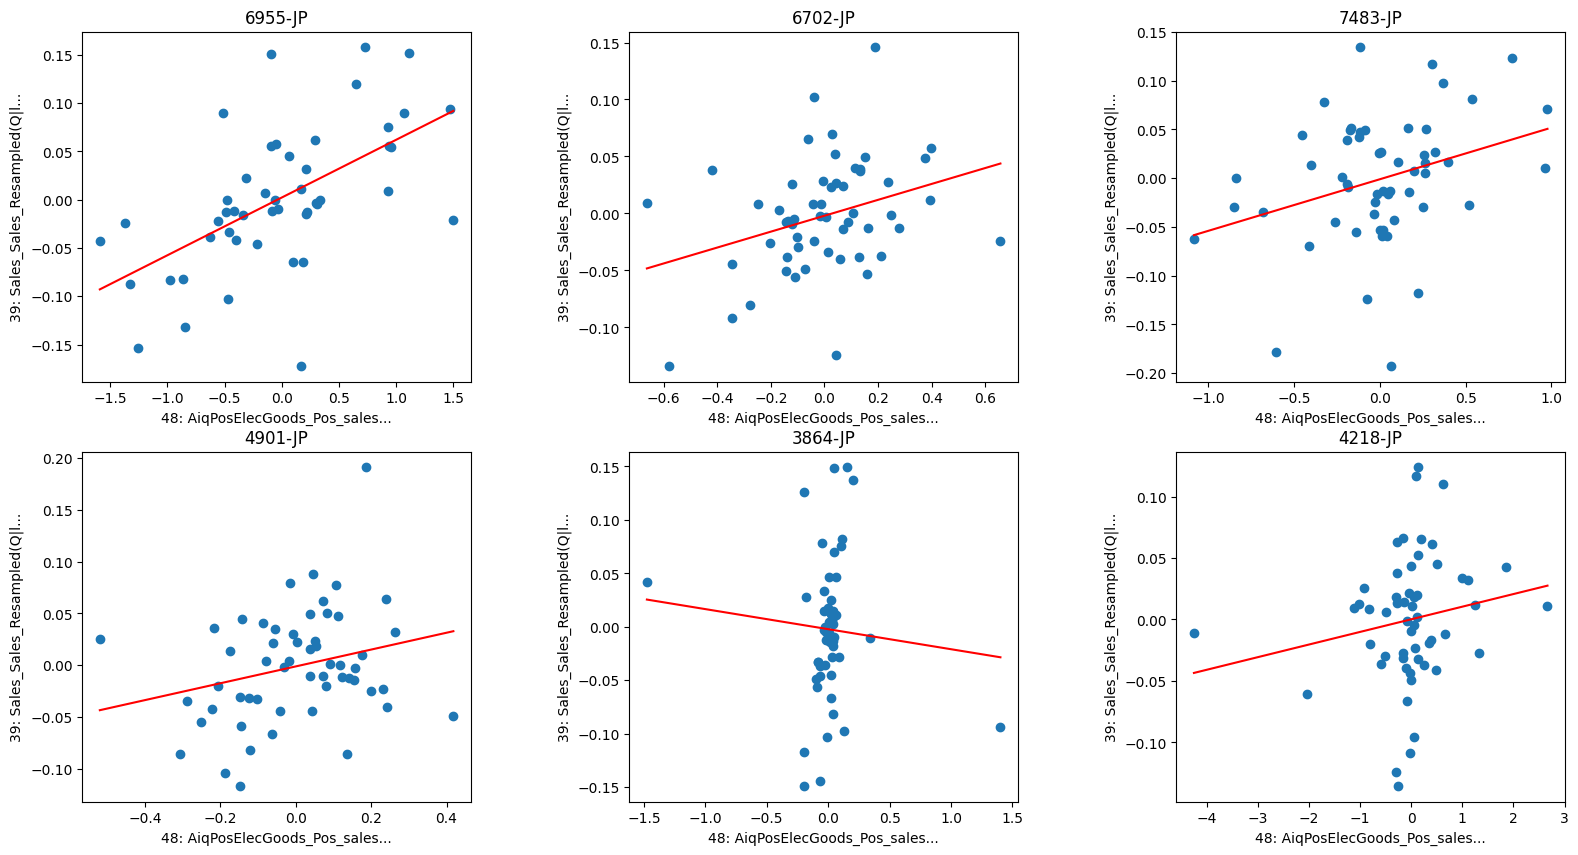

In [26]:
top6tickers = rho_time.T.xs('t-val', level=1).sort_values('pos_sales', ascending=False).index[:6]

sdh.show_scatter_per_target(
    y=sales_id,
    x=alt_Q_shift_1_logdiff_ids[0],
    targets=top6tickers,
    col_num=3,
    vname_len_limit=25,
)

#### Step 3.2: measuring usefulness against market data
Likewise, the same evaluation can be done for market price returns.
In this example, how quarterly aggregated alternative data correlates with market_price returns is measured.

In [27]:
mkt_D_close_id = sdh.transform.resample(data_id=data_id_mkt, rule='D', fields='close', func='last').variable_ids[-1]
alt_D_shift_0_ids = sdh.transform\
    .multiply(data_id=data_id_alt, x1field="pos_sales", x2field="unit_price")\
    .resample(rule='D', func='mean')\
    .sma(periods=14).variable_ids

alt_D_shift_0_ids

[81]

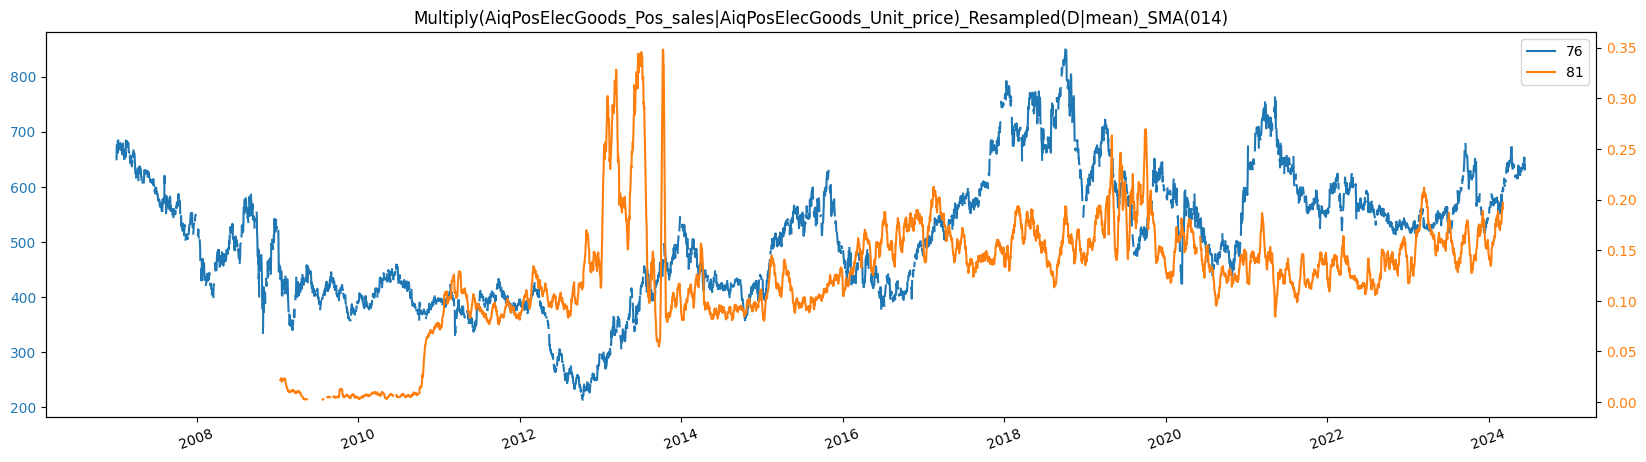

In [28]:
sdh.show_line_one_target(
    target=sample_target,
    y=mkt_D_close_id,
    X=alt_D_shift_0_ids[:1],
    col_num=1
)

In [29]:
def calc_min_period(sma_period):
    return int(max(np.floor(sma_period * 5 / 7), 1))

def trans_pre(data_id, sma_period, reindex_label):
    min_period = calc_min_period(sma_period)
    t = sdh.transform\
        .multiply(data_id=data_id, x1field="pos_sales", x2field="unit_price")\
        .resample(rule='D', func='last')\
        .sma(periods=sma_period, min_periods=min_period)\
        .reindex(label=reindex_label)
    return t
    
def trans_post(t_in, shift_period):
    return t_in.shift(periods=shift_period)

def trans_nologdiff(data_id, shift_period, sma_period, reindex_label):
    t1 = trans_pre(data_id, sma_period, reindex_label)
    t2 = trans_post(t1, shift_period)
    return t2.variable_ids

def trans(data_id, shift_period, sma_period, reindex_label):
    log_diff_periods = 252  # 365 - holidays
    t1 = trans_pre(data_id, sma_period, reindex_label)
    t2 = t1.log_diff(periods=log_diff_periods)
    t3 = trans_post(t2, shift_period)
    return t3.variable_ids

In [30]:
param_combis = list(product(
    range(0, 20, 2),    # shift
    range(4, 40, 2),  # sma
))

In [31]:
close_ret = sdh.transform.dropna(fields=mkt_D_close_id, how='all')\
    .log_diff(periods=1, names='ret').variable_ids[-1]

In [32]:
alt_D_para_ids = [
    trans_nologdiff(data_id_alt, t[0], t[1], close_ret)
    for t in param_combis]

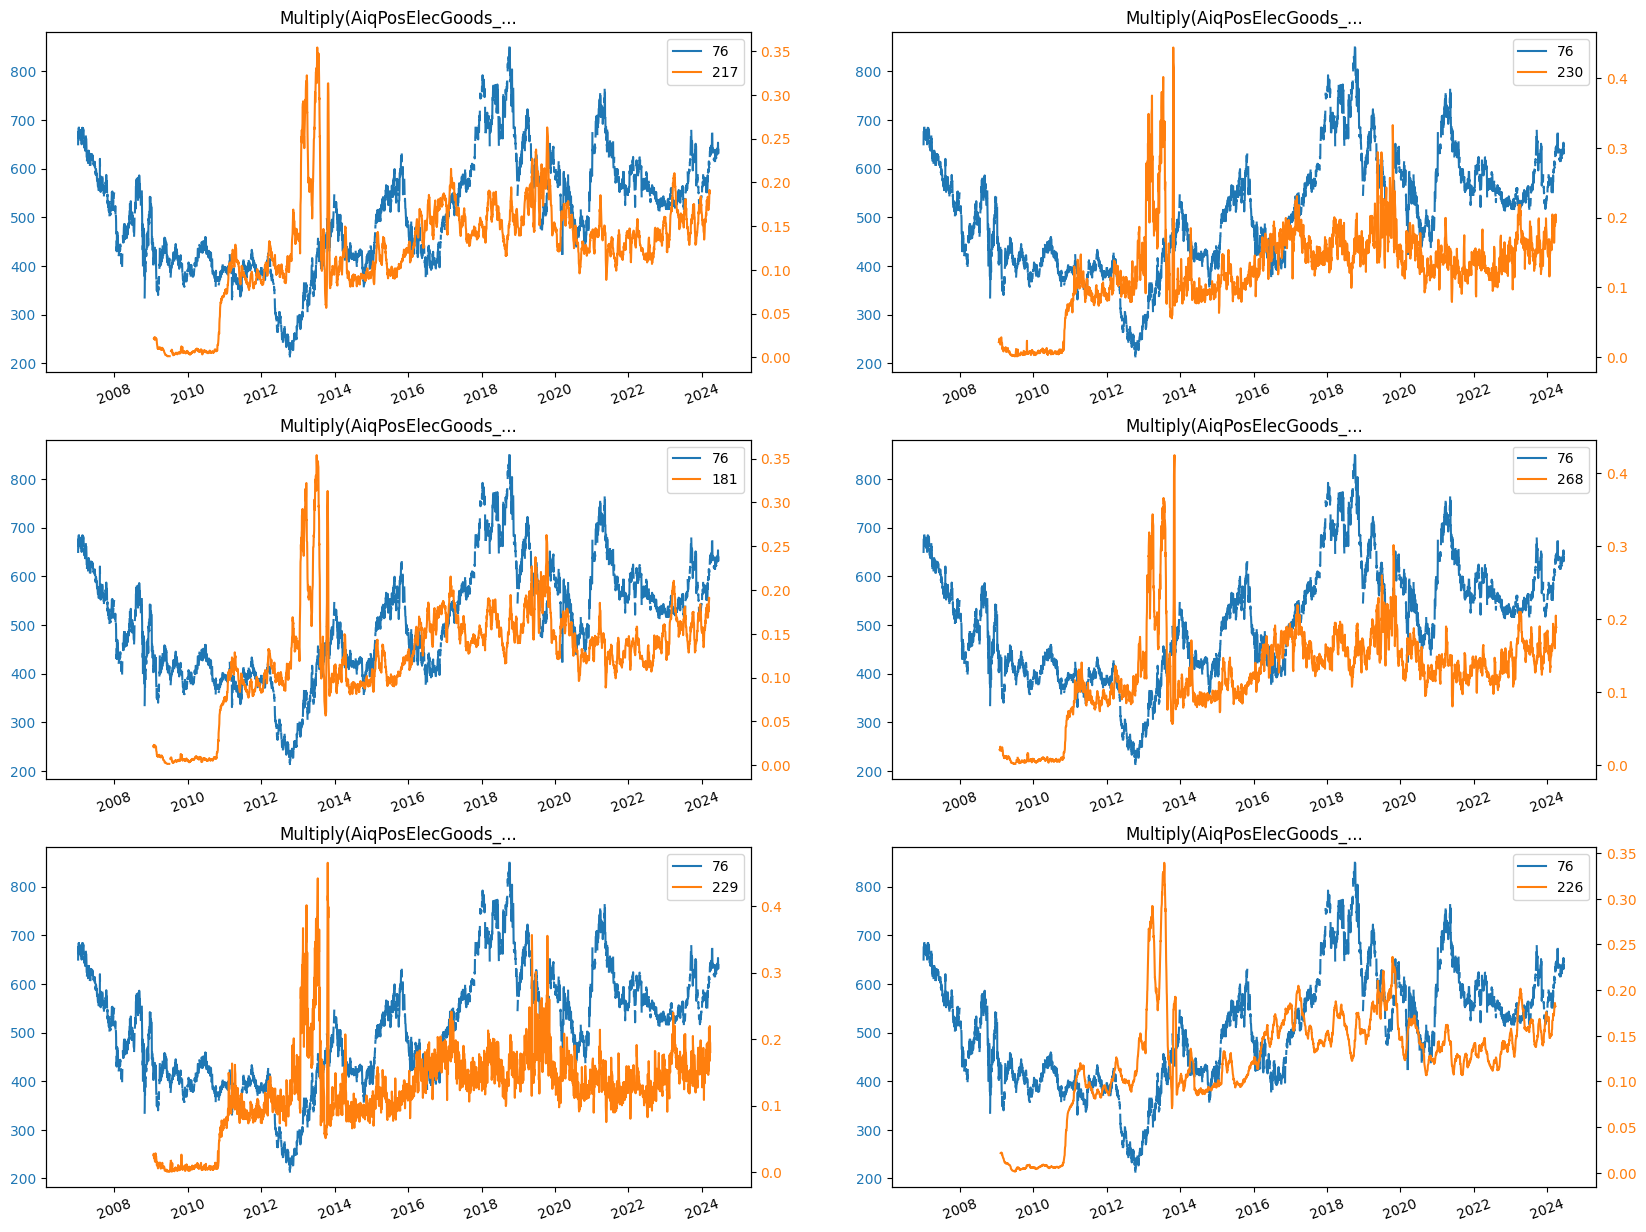

In [33]:
# View Sales vs Pos Sales
selected_ids = [e[0] for e in sample(alt_D_para_ids, 6)]
sdh.show_line_one_target(
    target=sample_target,
    y=mkt_D_close_id,
    X=selected_ids,
    col_num=2,
    vname_len_limit=25,
)

Transformation

In [34]:
alt_D_para_ld_ids = [
    trans(data_id_alt, t[0], t[1], close_ret)
    for t in param_combis]

Calculation

In [35]:
results = [ade.compu_rho(id, close_ret, rename_features=features) for id in alt_D_para_ld_ids[:]]

In [36]:
sdh.transform.get_variable_name(alt_D_para_ld_ids[0][0])

'Multiply(AiqPosElecGoods_Pos_sales|AiqPosElecGoods_Unit_price)_Resampled(D|last)_SMA(004)_Reindexed(ret)_LogDiff(252)_Shifted(000)'

##### Select the top 5 most highly correlated features

In [37]:
rho_l = [e.loc["pos_sales", "t-val"] for e in results]
combined = list(zip(rho_l, alt_D_para_ld_ids, param_combis))
combined_sorted = sorted(combined, key=lambda x: x[0], reverse=True)
top_id = combined_sorted[0][1][0]
top_id

304

In [38]:
combined_sorted[:5]

[(4.291287940724443, [304], (0, 6)),
 (3.796853423730382, [346], (2, 22)),
 (3.755295801828309, [347], (2, 24)),
 (3.7515571469408715, [322], (0, 24)),
 (3.6911703787921537, [396], (8, 14))]

In [39]:
rho_in_param = ade.compu_rho(top_id, close_ret, by='ticker', rename_features=["val"])
top6tickers = rho_in_param.T.xs('t-val', level=1).sort_values('val', ascending=False).index[:6]

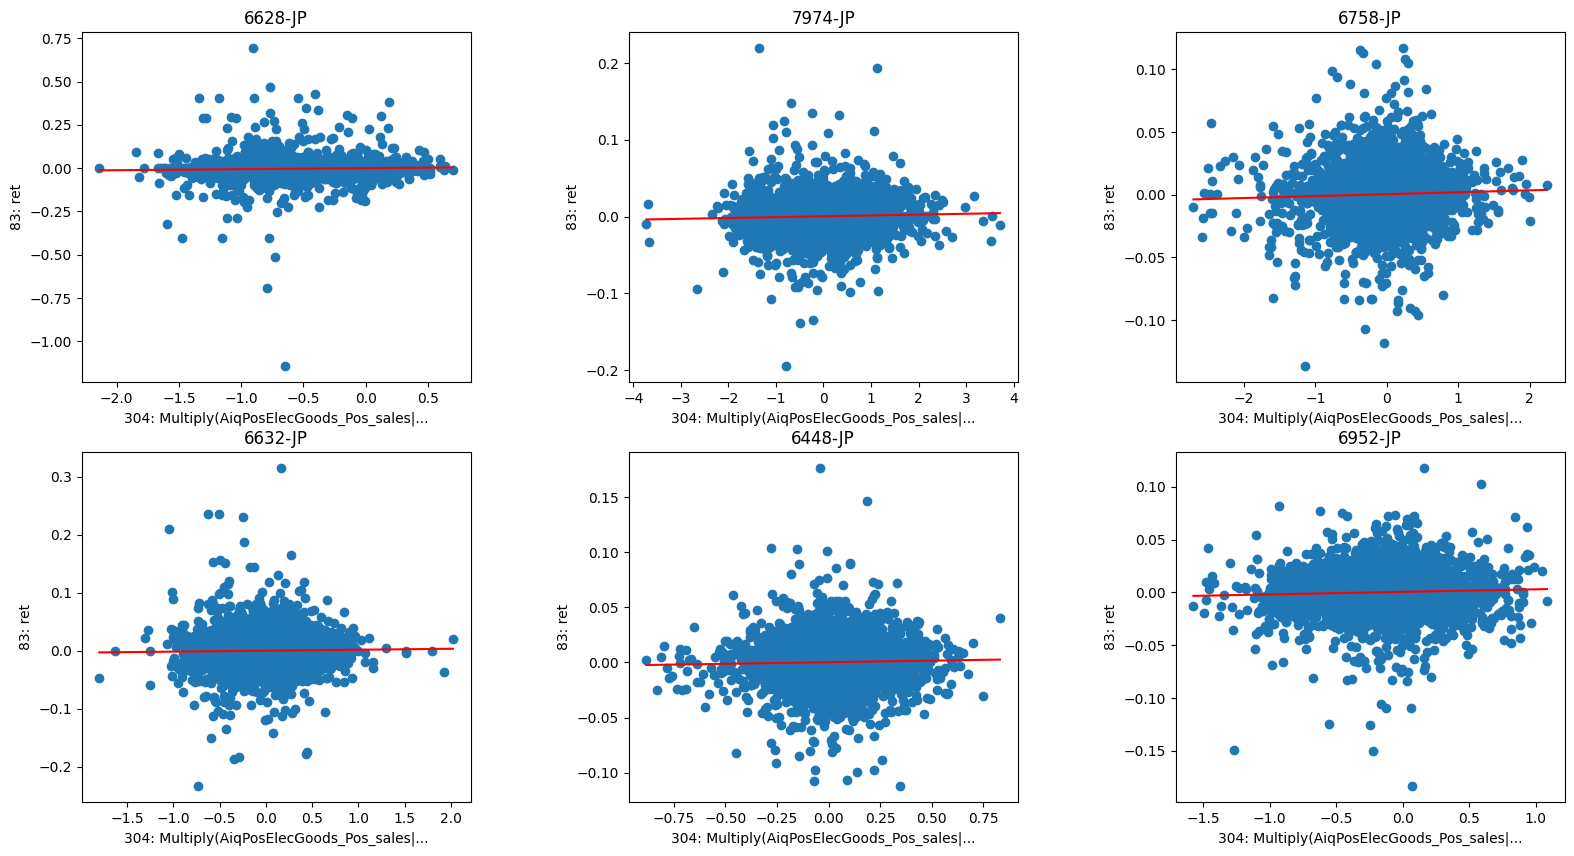

In [40]:
sdh.show_scatter_per_target(
    y=close_ret,
    x=top_id,
    targets=top6tickers,
    col_num=3,
    vname_len_limit=35,
)

### Step4: Quantile Backtest
Back-testing using the most highly correlated features against market data.

In [41]:
proto_trans_vid = trans(data_id_alt, 4, 20, close_ret)

In [42]:
proto_trans_vid

[363]

In [43]:
top_id

304

In [44]:
# define the parameters for factor choice.
nq = 3
exe_cost = 0.0005

# Use pre-created variable ID
# pos_sales = top_id
pos_sales = proto_trans_vid[0]
ret = close_ret

In [45]:
sdh.transform.get_variable_name(pos_sales)

'Multiply(AiqPosElecGoods_Pos_sales|AiqPosElecGoods_Unit_price)_Resampled(D|last)_SMA(020)_Reindexed(ret)_LogDiff(252)_Shifted(004)'

In [46]:
dfqret, stats, dfsigqt = ade.q_backtest(
    feature=pos_sales,
    actual_return=ret,
    nq=nq,
    exe_cost=exe_cost,
    plot=True,
    stats=True
)

,cum.Ret,ann.Ret,ann.Std,R/R,Win_R,ann.TurnOver,Max_DD,Calmar Ratio
#1,-0.094826,-0.006715,0.204391,-0.032856,0.521437,18.501702,-0.780360,-0.008606
#2,1.158301,0.082029,0.204390,0.401338,0.542874,32.439347,-0.563791,0.145496
#3,1.143865,0.081007,0.203509,0.398051,0.544322,19.452528,-0.481842,0.168120
#3-#1,1.238691,0.087723,0.118930,0.737596,0.520857,37.954230,-0.233443,0.375777
#3-#1(cost),0.970724,0.068745,0.118947,0.577949,0.516222,37.954230,-0.253788,0.270877
